# Demo notebook for autoclasswrapper

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import autoclasswrapper as wrapper

%matplotlib inline

## Dataset generation (toy dataset)

In [19]:
size = 50
sigma = 0.6
x = np.concatenate((np.random.normal(3, sigma, size), np.random.normal(4, sigma, size), np.random.normal(6, sigma, size)))
y = np.concatenate((np.random.normal(4, sigma, size), np.random.normal(0, sigma, size), np.random.normal(5, sigma, size)))
color = ["blue"]*size+["orange"]*size+["purple"]*size
name = ["id{:03d}".format(id) for id in range(size*3)]
df = pd.DataFrame.from_dict({"x":x, "y":y, "color":color})
df.index = name
df.index.name = "name"
df.head()

,x,y,color
name,,,
id000,2.094036,4.244686,blue
id001,3.119712,4.227933,blue
id002,3.284543,3.326259,blue
id003,3.161084,3.968565,blue
id004,3.796472,3.939852,blue


(-5, 10)

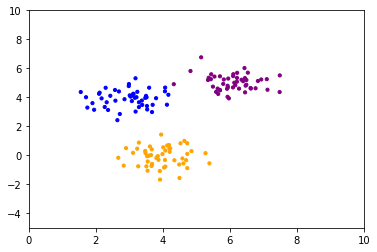

In [23]:
plt.scatter(df["x"], df["y"], color=df["color"], s=10)
plt.xlim(0, 10)
plt.ylim(-5, 10)

In [26]:
# verify all x are > 0
assert min(df["x"]) > 0

In [24]:
df["x"].to_csv("demo_real_scalar.tsv", sep="\t", header=True)
df["y"].to_csv("demo_real_location.tsv", sep="\t", header=True)

## Autoclasswrapper - step 1 - prepare data

In [27]:
# create object to prepare dataset
clust = wrapper.Input()

# load dataset in tsv format
clust.add_input_data("demo_real_scalar.tsv", "real scalar", 0.01)
clust.add_input_data("demo_real_location.tsv", "real location", 0.01)

# merge datasets if multiple dataset had been loaded
clust.merge_dataframes()

# create files needed by autoclass
clust.create_db2_file()
clust.create_hd2_file()
clust.create_model_file()
clust.create_sparams_file()
clust.create_rparams_file()

2018-12-11 23:16:48 INFO     Reading data file 'demo_real_scalar.tsv' as 'real scalar' with error 0.01
2018-12-11 23:16:48 INFO     Detected encoding: ascii
2018-12-11 23:16:48 INFO     Found 150 rows and 2 columns
2018-12-11 23:16:48 DEBUG    Checking column names
2018-12-11 23:16:48 DEBUG    Index name 'name'
2018-12-11 23:16:48 DEBUG    Column name 'x'
2018-12-11 23:16:48 INFO     Checking data format
2018-12-11 23:16:48 INFO     Column 'x'
count    150.000000
mean       4.346629
std        1.450099
min        1.546894
50%        4.062039
max        7.491433
2018-12-11 23:16:48 INFO     Reading data file 'demo_real_location.tsv' as 'real location' with error 0.01
2018-12-11 23:16:48 INFO     Detected encoding: ascii
2018-12-11 23:16:48 INFO     Found 150 rows and 2 columns
2018-12-11 23:16:48 DEBUG    Checking column names
2018-12-11 23:16:48 DEBUG    Index name 'name'
2018-12-11 23:16:48 DEBUG    Column name 'y'
2018-12-11 23:16:48 INFO     Checking data format
2018-12-11 23:16:48 

## Autoclasswrapper - step 2 - prepare run script & run autoclass

For this step AutoClass need to be installed locally and available in path.
Here is a quick solution:
```
wget https://ti.arc.nasa.gov/m/project/autoclass/autoclass-c-3-3-6.tar.gz
tar zxvf autoclass-c-3-3-6.tar.gz
rm -f autoclass-c-3-3-6.tar.gz
export PATH=$PATH:$(pwd)/autoclass-c
# if you are using a 64-bit operating system,
# you also need to install the standard 32-bit C libraries:
# sudo apt-get install -y libc6-i386
```

In [28]:
# search autoclass in path
wrapper.search_autoclass_in_path()

# create object to run autoclass
run = wrapper.Run()

# prepare script to run autoclass
run.create_run_file()

# run autoclass
run.run()


2018-12-11 23:17:00 INFO     autoclass executable found in /home/pierre/.soft/bin/autoclass
2018-12-11 23:17:00 INFO     Writing run file
2018-12-11 23:17:00 INFO     Running clustering...


## Autoclasswrapper - step 3 - parse and format results 

2018-12-11 23:17:15 INFO     Extracting autoclass results
2018-12-11 23:17:15 INFO     Found 150 cases classified in 3 classes
2018-12-11 23:17:15 INFO     Aggregating input data
2018-12-11 23:17:15 INFO     Writing clust + probs .tsv file
2018-12-11 23:17:15 INFO     Writing .cdt file
2018-12-11 23:17:15 INFO     Writing .cdt file (with probs)
2018-12-11 23:17:15 INFO     Writing cluster stats
2018-12-11 23:17:15 INFO     Writing dendrogram
2018-12-11 23:17:15 INFO     clust_out.tsv added to zip file
2018-12-11 23:17:15 INFO     clust_out.cdt added to zip file
2018-12-11 23:17:15 INFO     clust_out_withprobs.cdt added to zip file
2018-12-11 23:17:15 INFO     clust_out_stats.tsv added to zip file
2018-12-11 23:17:15 INFO     clust_out_dendrogram.png added to zip file


'20181211-231715-autoclass-clust.zip'

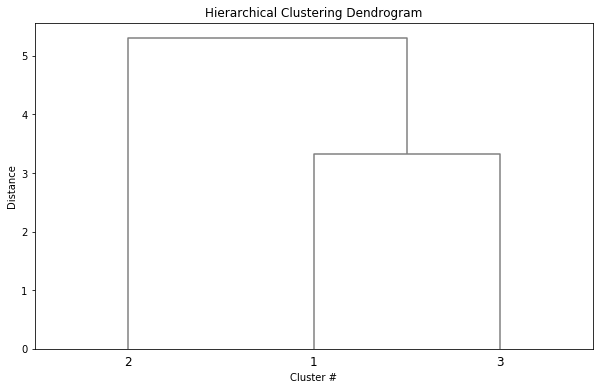

In [29]:
results = wrapper.Output()
results.extract_results()
results.aggregate_input_data()
results.write_cdt()
results.write_cdt(with_proba=True)
results.write_cluster_stats()
results.write_dendrogram()
results.wrap_outputs()